## Morphological TRansformations
pg 68- 72

### Goal

In this chapter,

• We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.

• We will see different functions like : **cv2.erode(), cv2.dilate(), cv2.morphologyEx() **


### Theory
Morphological transfomrations are some simple operations bases on the image shape. It is normally perfomed on biannry images. IT nees two imputs, open is our original image, second one is called **structuring element** or **kernel** wich decides the nature of operation. Two basic morpholofial operations are Erosion and Dialation. Then its variant forms like Opening, Closing , Gradient etc also comes into play. We will se them one by one with ehelp of following image

### 1. Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let’s see it how it works:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

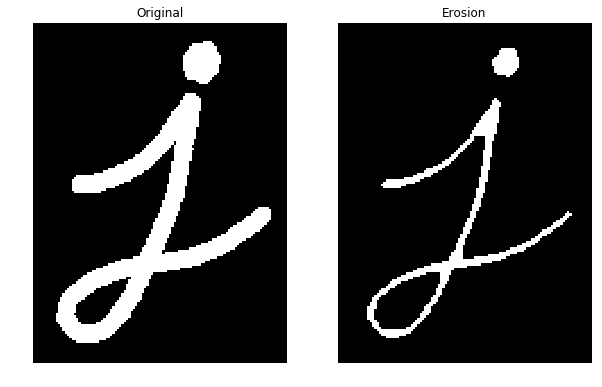

In [2]:
img = cv2.imread('images/j.png',0)

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)


# lets plot them
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(erosion,cmap='gray')
plt.title('Erosion'),plt.axis("off")


plt.show()

### 2. Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion
is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

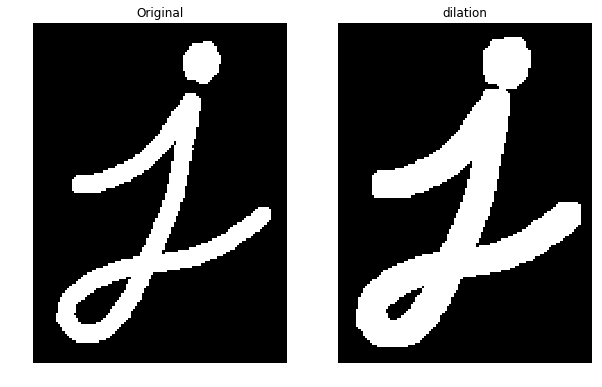

In [3]:
img = cv2.imread('images/j.png',0)

kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

# lets plot them
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(dilation,cmap='gray')
plt.title('dilation'),plt.axis("off")


plt.show()

### 3. Opening

Opening is just another name of **erosion** followed by **dilation**. It is useful in removing noise, as we explained above. Here we use the function, **cv2.morphologyEx()**

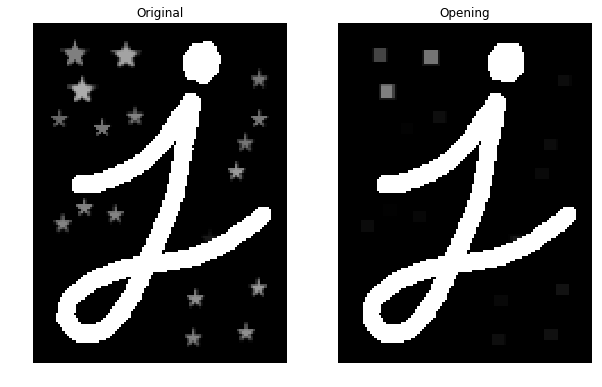

In [4]:
# need better image
img = cv2.imread('images/sj.png',0)

kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# lets plot them
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(opening,cmap='gray')
plt.title('Opening'),plt.axis("off")


plt.show()

### 4. Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.


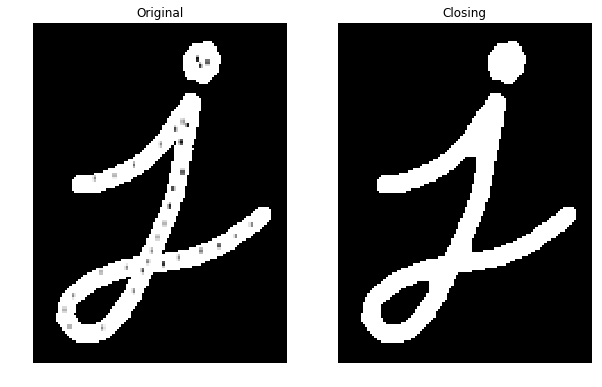

In [5]:
img = cv2.imread('images/js.png',0)

kernel = np.ones((5,5), np.uint8)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# lets plot them
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(closing,cmap='gray')
plt.title('Closing'),plt.axis("off")


plt.show()

### 5. Morphological Gradient

It is the difference between dilation and erosion of an image. The result will look like the outline of the object.



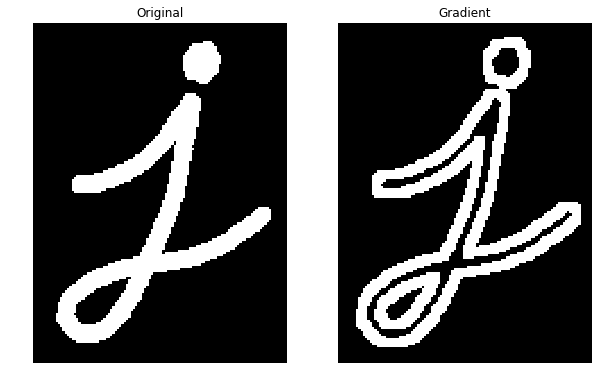

In [6]:
img = cv2.imread('images/j.png',0)

kernel = np.ones((5,5), np.uint8)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# lets plot them
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(gradient,cmap='gray')
plt.title('Gradient'),plt.axis("off")


plt.show()

### 6. Top Hat

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

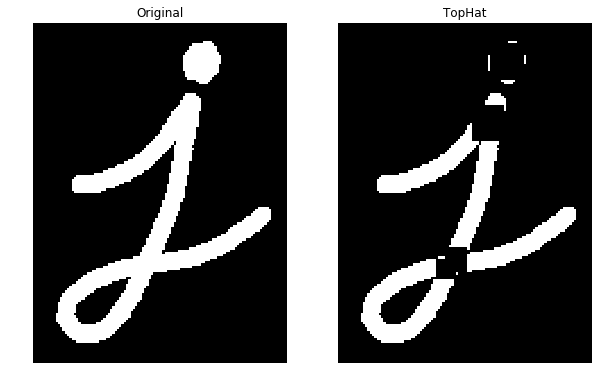

In [7]:
img = cv2.imread('images/j.png')

kernel = np.ones((9,9), np.uint8)  # CHANGE TO 9X9 kernel

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# lets plot them
plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(tophat,cmap='gray')
plt.title('TopHat'),plt.axis("off")


plt.show()

## Structuring Elements
We manually created a sttuctue elements in the prvious examples with help of Numpy. IT is rectangular shapae. But in some cases ou may need  eliptical/ curcular shaped kernels. So for this purose , Open CV has a function,**cv2.getStructuring Elements()**. You pass the shape ans size of the kernel, you get the desire kernel.

In [8]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [9]:
# Eliptical kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [10]:
# CRoss-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)